<a href="https://colab.research.google.com/github/mabittar/Learn/blob/master/Titanic_tensor_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# renderizar os gráficos diretamento no notebook
#%matplotlib inline

 #foundational package for scientific computing
import numpy as np

#collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import pandas as pd

#collection of functions for scientific and publication-ready visualization
import matplotlib.pyplot as plt

#Visualization
import seaborn as sns

#collection of functions for scientific computing and advance mathematics
import scipy as sp

#collection of machine learning algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Common Model Helpers
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import model_selection
import pylab as pl
from google.colab import drive

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Load Data
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/'


datatrain = pd.read_csv(r"/content/gdrive/My Drive/Colab/data/train.csv")
datatest = pd.read_csv(r"/content/gdrive/My Drive/Colab/data/test.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
datatrain.head()
print("********************")
datatest.head()

********************


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
datatestcopy = datatest.copy()

In [0]:
print(datatrain.shape)
print(datatest.shape)

(891, 12)
(418, 11)


In [0]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
print('Train columns with null values: {} \n' .format( datatrain.isnull().sum()))

print('Test columns with null values: {}'.format( datatest.isnull().sum()))

Train columns with null values: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

Test columns with null values: PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [0]:
datatrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
### we are compling the both data with median in Age, mode in Embarked and mediam in Fare

#First datatrain

datatrain['Age'].fillna(datatrain['Age'].median(), inplace = True)
datatrain['Embarked'].fillna(datatrain['Embarked'].mode()[0], inplace = True)
datatrain['Fare'].fillna(datatrain['Fare'].median(), inplace = True)

#Now the datatest 

datatest['Age'].fillna(datatest['Age'].median(), inplace = True)
datatest['Embarked'].fillna(datatest['Embarked'].mode()[0], inplace = True)
datatest['Fare'].fillna(datatest['Fare'].median(), inplace = True)

In [0]:
print('Train columns with null values: {} \n' .format( datatrain.isnull().sum()))
print("*************************************")
print('Test columns with null values: {}'.format( datatest.isnull().sum()))

Train columns with null values: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64 

*************************************
Test columns with null values: PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [0]:
#Now we are deleting the ['PassengerId','Cabin', 'Ticket'] COLUMNS
drop_column = ['PassengerId','Cabin', 'Ticket']
datatrain.drop(drop_column, axis=1, inplace = True)
datatest.drop(drop_column, axis=1, inplace = True)
datatrain.head()

KeyError: ignored

In [0]:
alltables = [datatrain, datatest]

for dataset in alltables:    
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]


    #Continuous variable bins; qcut vs cut: https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut
    #Fare Bins/Buckets using qcut or frequency bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    #Age Bins/Buckets using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)


    
#cleanup rare title names
#print(data1['Title'].value_counts())
stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
title_names = (datatrain['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
datatrain['Title'] = datatrain['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(datatrain['Title'].value_counts())
print("----------")


#preview data again
datatrain.info()
datatest.info()
datatrain.head()

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
FareBin       891 non-null category
AgeBin        891 non-null category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
Pclass        418 non-null int64
Name          418 non-null object
Sex           418 non-null object
Age           418 non-null flo

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"


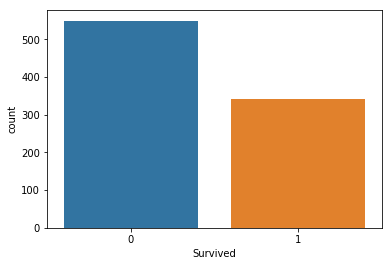

In [0]:
sns.countplot(x="Survived", data=datatrain)  # How many people survived

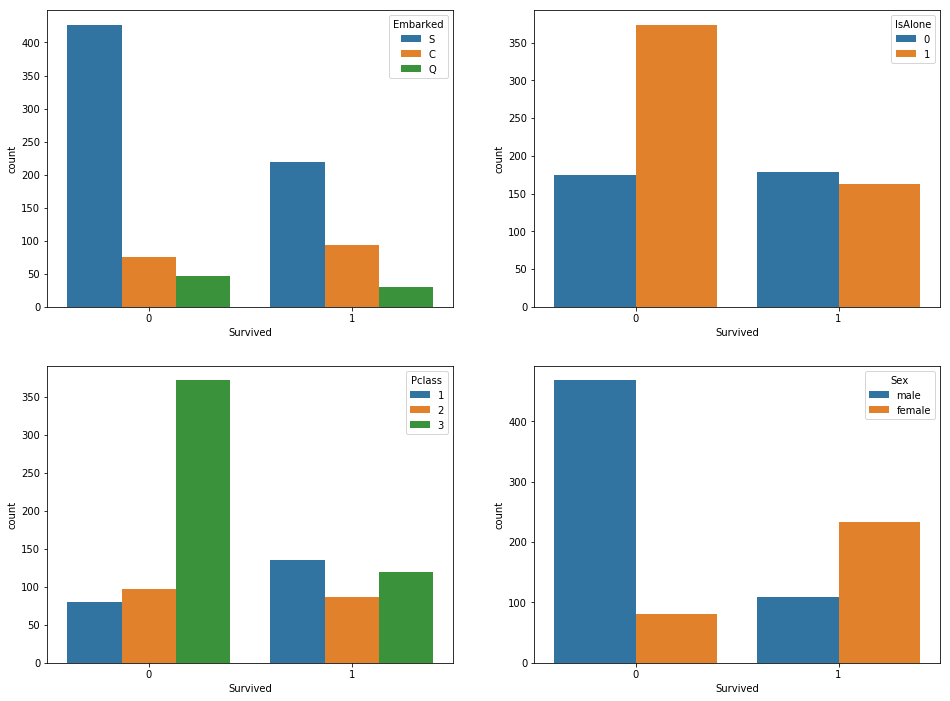

In [0]:
#graph individual features by survival
fig, saxis = plt.subplots(2, 2,figsize=(16,12))

sns.countplot(x='Survived', hue="Embarked", data=datatrain,ax = saxis[0,0])   
sns.countplot(x='Survived', hue="IsAlone", data=datatrain,ax = saxis[0,1])
sns.countplot(x="Survived", hue="Pclass", data=datatrain, ax = saxis[1,0])
sns.countplot(x="Survived", hue="Sex", data=datatrain, ax = saxis[1,1])
plt.show()

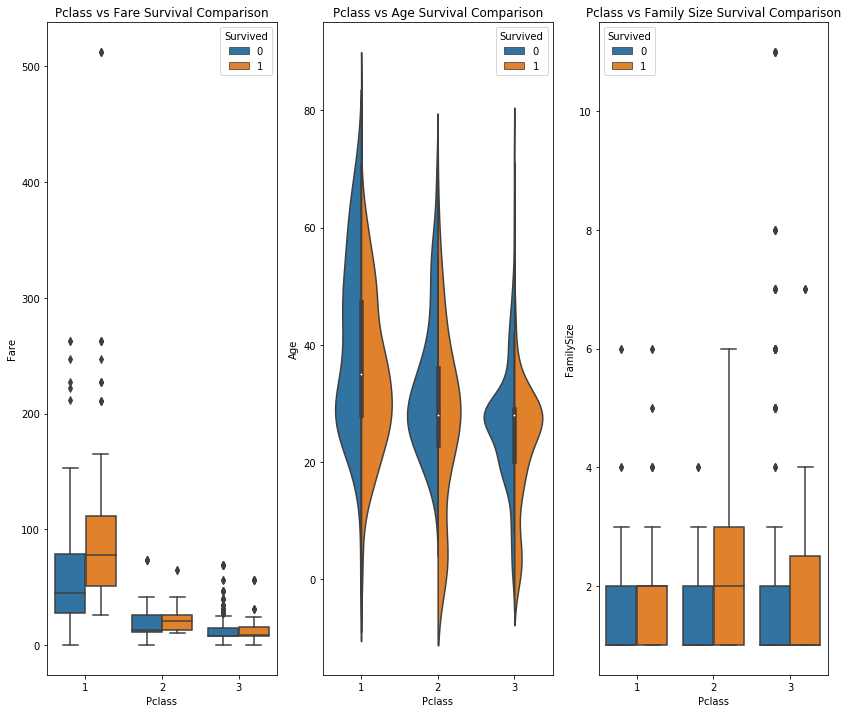

In [0]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = datatrain, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = datatrain, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = datatrain, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')
plt.show()

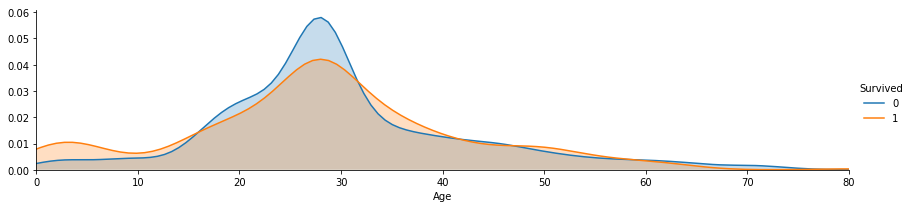

In [0]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( datatrain, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , datatrain['Age'].max()))
a.add_legend()

In [0]:
#code categorical data
label = LabelEncoder()

for dataset in alltables:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])


#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
datatrain_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
datatrain_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
datatrain_xy =  Target + datatrain_x
print('Original X Y: ', datatrain_xy, '\n')


#define x variables for original w/bin features to remove continuous variables
datatrain_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
datatrain_xy_bin = Target + datatrain_x_bin
print('Bin X Y: ', datatrain_xy_bin, '\n')


#define x and y variables for dummy features original
datatrain_dummy = pd.get_dummies(datatrain[datatrain_x])
datatrain_x_dummy = datatrain_dummy.columns.tolist()
datatrain_xy_dummy = Target + datatrain_x_dummy
print('Dummy X Y: ', datatrain_xy_dummy, '\n')

datatrain_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


In [0]:
#split train and test data with function defaults


train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = train_test_split(datatrain[datatrain_x_calc], datatrain[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(datatrain[datatrain_x_bin], datatrain[Target] , random_state = 0)

print("DataTrain Shape: {}".format(datatrain.shape))
print("Train1 Shape: {}".format(train1_x_dummy.shape))
print("Test1 Shape: {}".format(test1_x_dummy.shape))

DataTrain Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


In [0]:
train1_x_dummy.head()

,Sex_Code,Pclass,Embarked_Code,Title_Code,SibSp,Parch,Age,Fare
105,1,3,2,3,0,0,28.0,7.8958
68,0,3,2,2,4,2,17.0,7.9250
253,1,3,2,3,1,0,30.0,16.1000
320,1,3,2,3,0,0,22.0,7.2500
706,0,2,2,4,0,0,45.0,13.5000


In [0]:
#RandonForest

from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier(max_depth=2)
Model.fit(train1_x_dummy, train1_y_dummy)
y_predR=Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy,y_predR))
print(confusion_matrix(y_predR,test1_y_dummy))
#Accuracy Score
print('accuracy is ',accuracy_score(y_predR,test1_y_dummy))

RT = accuracy_score(y_predR,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       139
           1       0.91      0.50      0.65        84

    accuracy                           0.79       223
   macro avg       0.84      0.74      0.75       223
weighted avg       0.82      0.79      0.78       223

[[135  42]
 [  4  42]]
accuracy is  0.7937219730941704


In [0]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
Model.fit(train1_x_dummy, train1_y_dummy)

y_predLR = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_predLR))
print(confusion_matrix(test1_y_dummy, y_predLR))
# Accuracy score
print('accuracy is',accuracy_score(y_predLR,test1_y_dummy))

LR = accuracy_score(y_predLR,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       139
           1       0.74      0.67      0.70        84

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223

[[119  20]
 [ 28  56]]
accuracy is 0.7847533632286996


In [0]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(train1_x_dummy, train1_y_dummy)

y_predKN = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_predKN))
print(confusion_matrix(test1_y_dummy, y_predKN))
# Accuracy score

print('accuracy is',accuracy_score(y_predKN,test1_y_dummy))

KNN = accuracy_score(y_predKN,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.70      0.89      0.79       139
           1       0.68      0.38      0.49        84

    accuracy                           0.70       223
   macro avg       0.69      0.64      0.64       223
weighted avg       0.70      0.70      0.67       223

[[124  15]
 [ 52  32]]
accuracy is 0.6995515695067265


In [0]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(train1_x_dummy, train1_y_dummy)

y_predN = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_predN))
print(confusion_matrix(test1_y_dummy, y_predN))
# Accuracy score
print('accuracy is',accuracy_score(y_predN,test1_y_dummy))

NBB = accuracy_score(y_predN,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.87      0.78      0.83       139
           1       0.69      0.81      0.75        84

    accuracy                           0.79       223
   macro avg       0.78      0.80      0.79       223
weighted avg       0.80      0.79      0.80       223

[[109  30]
 [ 16  68]]
accuracy is 0.7937219730941704


In [0]:
# Support Vector Machine
from sklearn.svm import SVC

Model = SVC()
Model.fit(train1_x_dummy, train1_y_dummy)

y_predSVM = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_predSVM))
print(confusion_matrix(test1_y_dummy, y_predSVM))
# Accuracy score

print('accuracy is',accuracy_score(y_predSVM,test1_y_dummy))

SVMm = accuracy_score(y_predSVM,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       139
           1       0.67      0.63      0.65        84

    accuracy                           0.74       223
   macro avg       0.73      0.72      0.72       223
weighted avg       0.74      0.74      0.74       223

[[113  26]
 [ 31  53]]
accuracy is 0.7443946188340808


In [0]:
# Support Vector Machine's 
from sklearn.svm import NuSVC

ModelNU = NuSVC()
ModelNU.fit(train1_x_dummy, train1_y_dummy)

y_predNu = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_predNu))
print(confusion_matrix(test1_y_dummy, y_predNu))
# Accuracy score

print('accuracy is',accuracy_score(y_predNu,test1_y_dummy))

NuS = accuracy_score(y_predNu,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       139
           1       0.67      0.63      0.65        84

    accuracy                           0.74       223
   macro avg       0.73      0.72      0.72       223
weighted avg       0.74      0.74      0.74       223

[[113  26]
 [ 31  53]]
accuracy is 0.7443946188340808


In [0]:
# Linear Support Vector Classification
from sklearn.svm import LinearSVC

Model = LinearSVC()
Model.fit(train1_x_dummy, train1_y_dummy)

y_pred = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_pred))
print(confusion_matrix(test1_y_dummy, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,test1_y_dummy))

LSVM = accuracy_score(y_pred,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       139
           1       0.71      0.67      0.69        84

    accuracy                           0.77       223
   macro avg       0.76      0.75      0.75       223
weighted avg       0.77      0.77      0.77       223

[[116  23]
 [ 28  56]]
accuracy is 0.7713004484304933


In [0]:
from sklearn.neighbors import  RadiusNeighborsClassifier
Model=RadiusNeighborsClassifier(radius=148)
Model.fit(train1_x_dummy, train1_y_dummy)
y_pred=Model.predict(test1_x_dummy)

#summary of the predictions made by the classifier
print(classification_report(test1_y_dummy,y_pred))
print(confusion_matrix(test1_y_dummy,y_pred))

#Accouracy score
print('accuracy is ', accuracy_score(test1_y_dummy,y_pred))

RNC = accuracy_score(test1_y_dummy,y_pred)

              precision    recall  f1-score   support

           0       0.64      0.99      0.78       139
           1       0.86      0.07      0.13        84

    accuracy                           0.65       223
   macro avg       0.75      0.53      0.45       223
weighted avg       0.72      0.65      0.53       223

[[138   1]
 [ 78   6]]
accuracy is  0.6457399103139013


In [0]:
from sklearn.linear_model import PassiveAggressiveClassifier
Model = PassiveAggressiveClassifier()
Model.fit(train1_x_dummy, train1_y_dummy)

y_pred = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_pred))
print(confusion_matrix(test1_y_dummy, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,test1_y_dummy))

PAC = accuracy_score(y_pred,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.64      0.99      0.78       139
           1       0.83      0.06      0.11        84

    accuracy                           0.64       223
   macro avg       0.73      0.53      0.44       223
weighted avg       0.71      0.64      0.53       223

[[138   1]
 [ 79   5]]
accuracy is 0.6412556053811659


In [0]:
# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
Model = BernoulliNB()
Model.fit(train1_x_dummy, train1_y_dummy)

y_pred = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_pred))
print(confusion_matrix(test1_y_dummy, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,test1_y_dummy))

Ber = accuracy_score(y_pred,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       139
           1       0.71      0.71      0.71        84

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223

[[115  24]
 [ 24  60]]
accuracy is 0.7847533632286996


In [0]:
# ExtraTreeClassifier
from sklearn.tree import ExtraTreeClassifier

Model = ExtraTreeClassifier()

Model.fit(train1_x_dummy, train1_y_dummy)

y_pred = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_pred))
print(confusion_matrix(test1_y_dummy, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,test1_y_dummy))

ETC = accuracy_score(y_pred,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       139
           1       0.70      0.73      0.71        84

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223

[[113  26]
 [ 23  61]]
accuracy is 0.7802690582959642


In [0]:
from sklearn.ensemble import BaggingClassifier
Model=BaggingClassifier()
Model.fit(train1_x_dummy, train1_y_dummy)
y_pred=Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy,y_pred))
print(confusion_matrix(y_pred,test1_y_dummy))

#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,test1_y_dummy))

BCC = accuracy_score(y_pred,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       139
           1       0.79      0.69      0.74        84

    accuracy                           0.82       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.81      0.82      0.81       223

[[124  26]
 [ 15  58]]
accuracy is  0.8161434977578476


In [0]:
from sklearn.ensemble import AdaBoostClassifier
Model=AdaBoostClassifier()
Model.fit(train1_x_dummy, train1_y_dummy)
y_pred=Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy,y_pred))
print(confusion_matrix(y_pred,test1_y_dummy))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,test1_y_dummy))

AdaB = accuracy_score(y_pred,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       139
           1       0.72      0.75      0.74        84

    accuracy                           0.80       223
   macro avg       0.78      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223

[[115  21]
 [ 24  63]]
accuracy is  0.7982062780269058


In [0]:
from sklearn.ensemble import GradientBoostingClassifier
ModelG=GradientBoostingClassifier()
ModelG.fit(train1_x_dummy, train1_y_dummy)
y_predGR=ModelG.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy,y_predGR))
print(confusion_matrix(y_predGR,test1_y_dummy))

#Accuracy Score
print('accuracy is ',accuracy_score(y_predGR,test1_y_dummy))

GBCC = accuracy_score(y_predGR,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       139
           1       0.84      0.75      0.79        84

    accuracy                           0.85       223
   macro avg       0.85      0.83      0.84       223
weighted avg       0.85      0.85      0.85       223

[[127  21]
 [ 12  63]]
accuracy is  0.852017937219731


In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
Model=LinearDiscriminantAnalysis()
Model.fit(train1_x_dummy, train1_y_dummy)
y_pred=Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy,y_pred))
print(confusion_matrix(y_pred,test1_y_dummy))

#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,test1_y_dummy))

LDAA = accuracy_score(y_pred,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       139
           1       0.71      0.68      0.70        84

    accuracy                           0.78       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.78      0.77       223

[[116  27]
 [ 23  57]]
accuracy is  0.7757847533632287


In [0]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
Model=QuadraticDiscriminantAnalysis()
Model.fit(train1_x_dummy, train1_y_dummy)
y_pred=Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy,y_pred))
print(confusion_matrix(y_pred,test1_y_dummy))

#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,test1_y_dummy))

QDAx = accuracy_score(y_pred,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       139
           1       0.69      0.76      0.72        84

    accuracy                           0.78       223
   macro avg       0.77      0.78      0.77       223
weighted avg       0.79      0.78      0.78       223

[[110  20]
 [ 29  64]]
accuracy is  0.7802690582959642


In [0]:
models = pd.DataFrame({
    'Model': [ 'Random Forest',
              'LogisticRegression','K-Nearest Neighbours', 'Naive Bayes', 'SVM', 'Nu-Support Vector Classification',
             'Linear Support Vector Classification', 'Radius Neighbors Classifier', 'Passive Aggressive Classifier','BernoulliNB',
             'ExtraTreeClassifier', "Bagging classifier ", "AdaBoost classifier", 'Gradient Boosting Classifier' ,'Linear Discriminant Analysis',
             'Quadratic Discriminant Analysis'],
    'Score': [ RT, LR, KNN,NBB,SVMm, NuS,  LSVM , RNC, PAC, Ber, ETC, BCC, AdaB,  GBCC, LDAA, QDAx]})
models.sort_values(by='Score', ascending=False)

,Model,Score
13,Gradient Boosting Classifier,0.852018
11,Bagging classifier,0.816143
12,AdaBoost classifier,0.798206
0,Random Forest,0.793722
3,Naive Bayes,0.793722
1,LogisticRegression,0.784753
9,BernoulliNB,0.784753
10,ExtraTreeClassifier,0.780269
15,Quadratic Discriminant Analysis,0.780269
14,Linear Discriminant Analysis,0.775785


Text(0, 0.5, 'Algorithm')

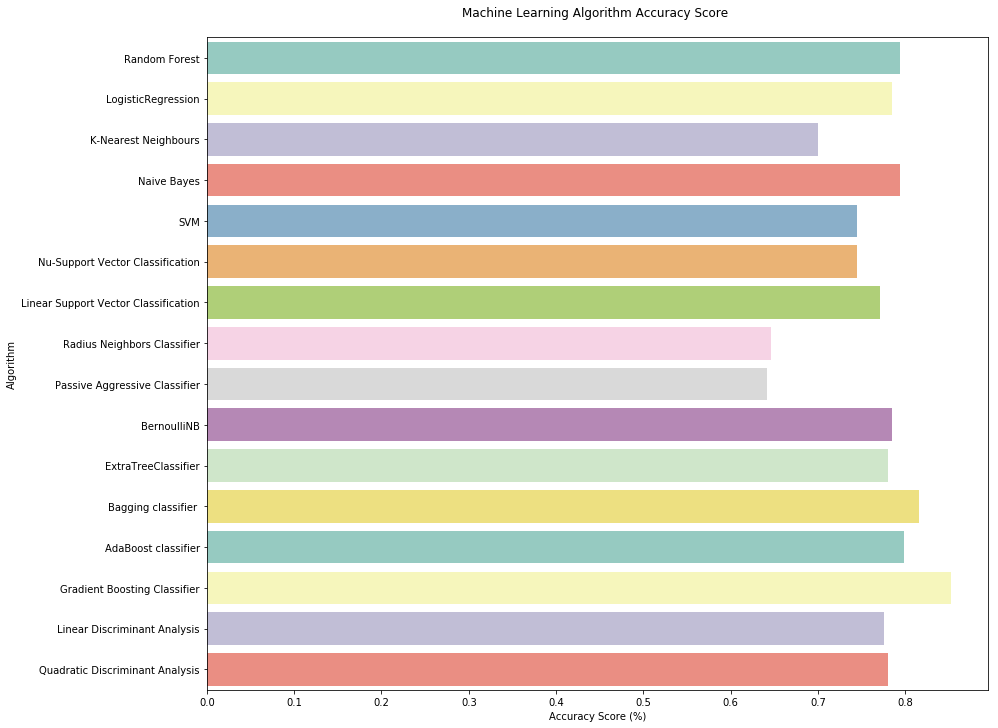

In [0]:
plt.subplots(figsize =(14, 12))

sns.barplot(x='Score', y = 'Model', data = models, palette="Set3")

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

In [0]:
#gradient boosting w/full dataset modeling submission score: defaults= 0.75119, tuned= 0.77033
submit_gbc = GradientBoostingClassifier()

submit_gbc.fit(datatrain[datatrain_x_bin], datatrain[Target])

rr = submit_gbc.predict(datatest[datatrain_x_bin])


In [0]:
rr


array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [0]:
submission = pd.DataFrame({
        "PassengerId": datatestcopy["PassengerId"],
        "Survived": rr
    })
submission.to_csv('/content/gdrive/My Drive/Colab/data/titanic_ML.csv', index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
